# Naive Bayes Gaussian (Heart Attack Prediction)

## Explanation

### Objective

Create a machine learning model that can predict whether a patient is suffering heart attack or not, using the Naive Bayes Gaussian algorithm.

### Column Descriptions

- ***Age*** = The age of the individual.
- ***Sex*** = The gender of the individual.
- ***Chest Pain Type*** = The type of chest pain experienced by the individual.
- ***Resting Blood Pressure*** = The resting blood pressure of the individual (in mm Hg).
- ***Cholesterol*** = The cholesterol levels of the individual (in mg/dL).
- ***Fasting Blood Sugar*** = The fasting blood sugar level of the individual (> 120 mg/dL is considered high).
- ***Resting Electrocardiographic Results (ECG)*** = Results of the resting electrocardiogram.
- ***Maximum Heart Rate Achieved*** = The maximum heart rate achieved by the individual during exercise.
- ***Exercise Induced Angina*** = Whether the individual experienced angina during exercise.
- ***ST Depression Induced by Exercise*** = The ST depression induced by exercise relative to rest.
- ***Slope of the Peak Exercise ST Segment*** = The slope of the peak exercise ST segment.
- ***Number of Major Vessels Colored by Fluoroscopy*** = The number of major blood vessels colored by fluoroscopy.
- ***Thalassemia*** = A blood disorder; different types of thalassemia might be represented in the dataset.
- ***Target*** = Whether the individual had a heart attack or not (typically represented as binary = 0 for no heart attack, 1 for heart attack).

## A. Data Preparation

### A.1 Import Libraries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### A.2 Load Data

In [44]:
try:
    df = pd.read_csv("heart.csv")
    print("Berhasil Membaca Data")
except:
    print("Gagal Membaca Data")

Berhasil Membaca Data


### A.3 Viewing Data Dimensions

In [45]:
df.shape

(303, 14)

### A.4 Viewing Data Informations

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### A.5 Viewing Data Statistics

In [47]:
df.describe().T.style.format("{:.2f}").background_gradient(cmap='flare')

,count,mean,std,min,25%,50%,75%,max
age,303.00,54.37,9.08,29.00,47.50,55.00,61.00,77.00
sex,303.00,0.68,0.47,0.00,0.00,1.00,1.00,1.00
cp,303.00,0.97,1.03,0.00,0.00,1.00,2.00,3.00
trtbps,303.00,131.62,17.54,94.00,120.00,130.00,140.00,200.00
chol,303.00,246.26,51.83,126.00,211.00,240.00,274.50,564.00
fbs,303.00,0.15,0.36,0.00,0.00,0.00,0.00,1.00
restecg,303.00,0.53,0.53,0.00,0.00,1.00,1.00,2.00
thalachh,303.00,149.65,22.91,71.00,133.50,153.00,166.00,202.00
exng,303.00,0.33,0.47,0.00,0.00,0.00,1.00,1.00
oldpeak,303.00,1.04,1.16,0.00,0.00,0.80,1.60,6.20


### A.6 Viewing Top 5 Data and Bottom 5 Data

In [48]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [49]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


### A.7 Viewing Duplicated Data

In [50]:
df.duplicated().sum()

np.int64(1)

In [51]:
df.drop_duplicates(inplace=True)

### A.8 Viewing Missing Data

In [52]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### A.9 Viewing Outlier Data

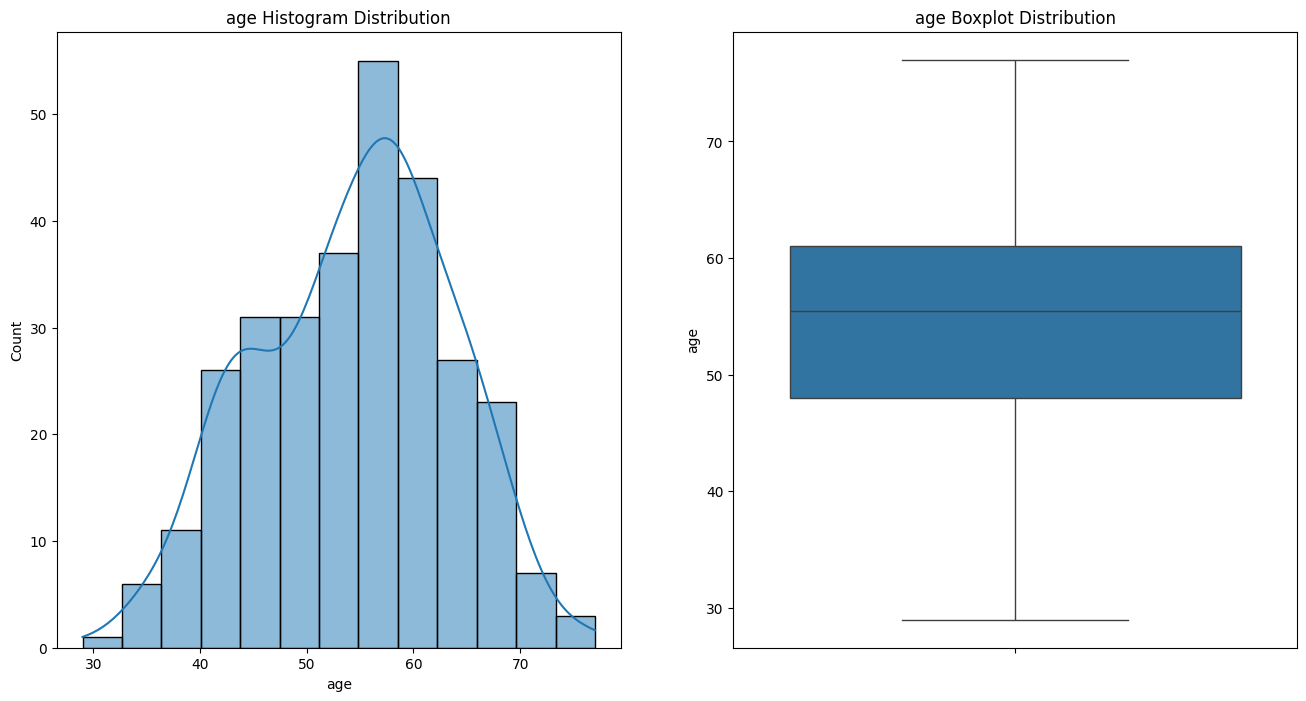

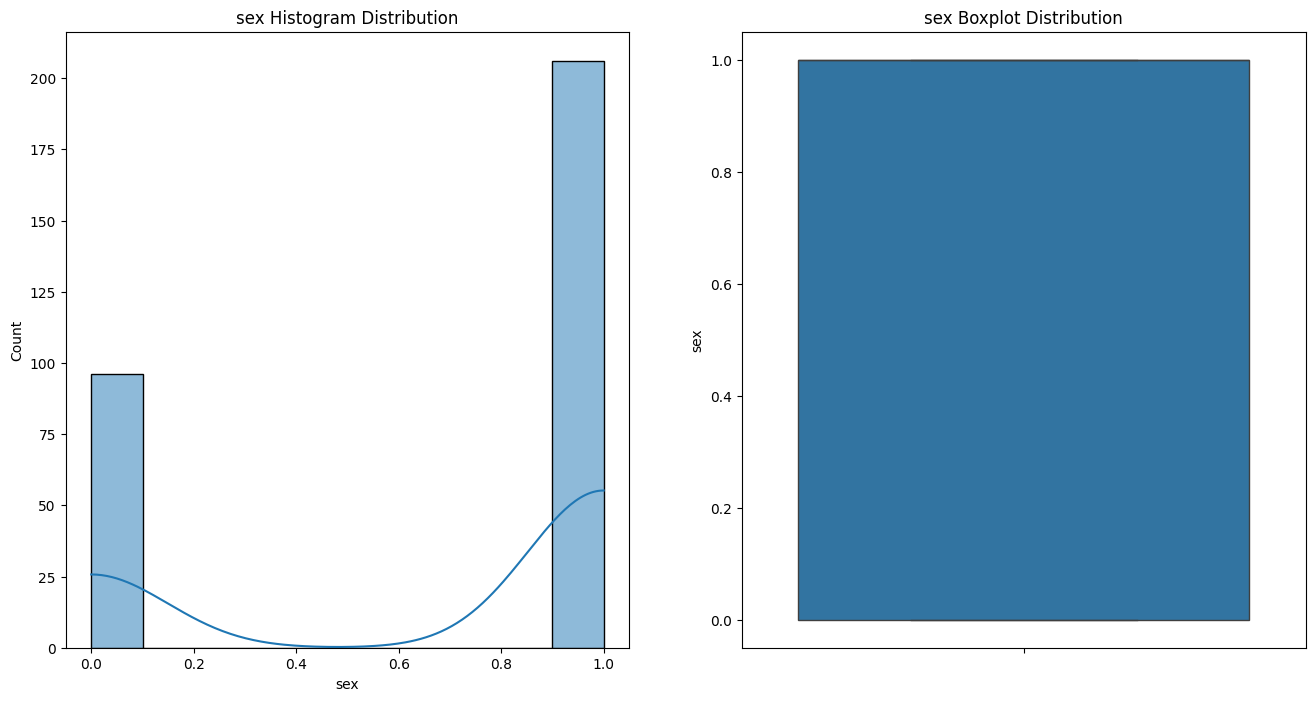

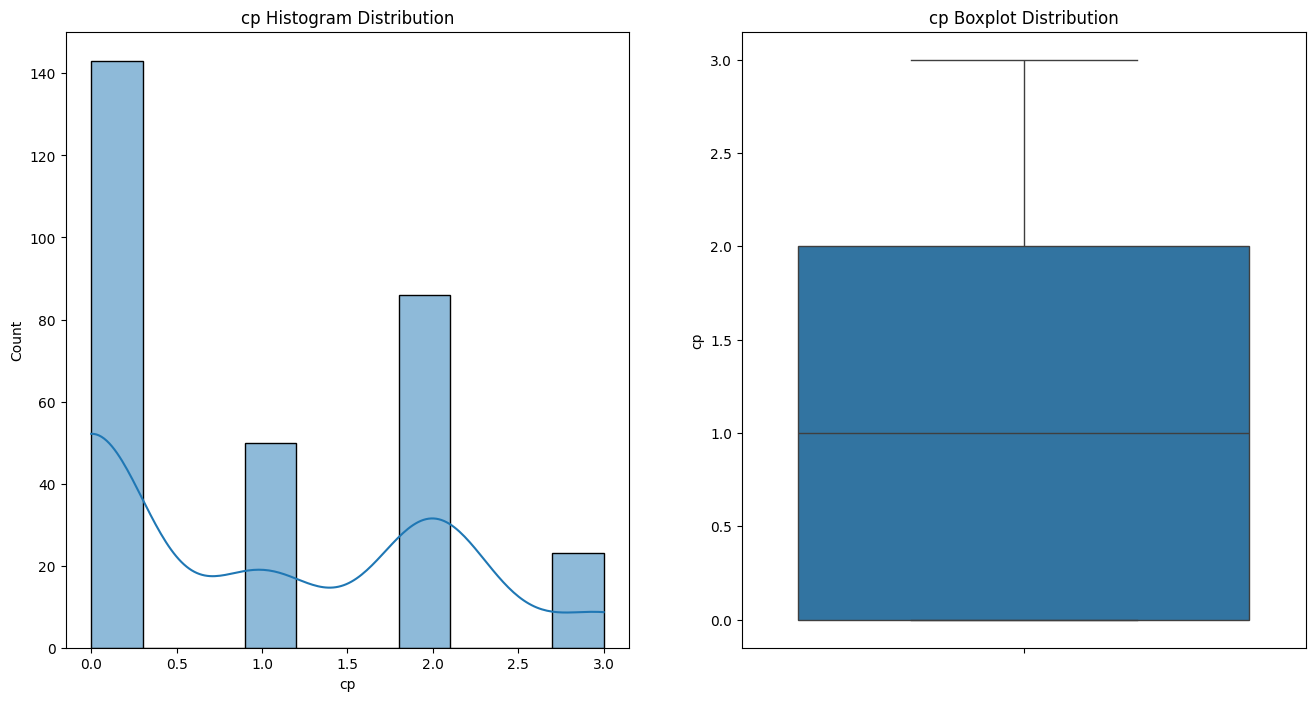

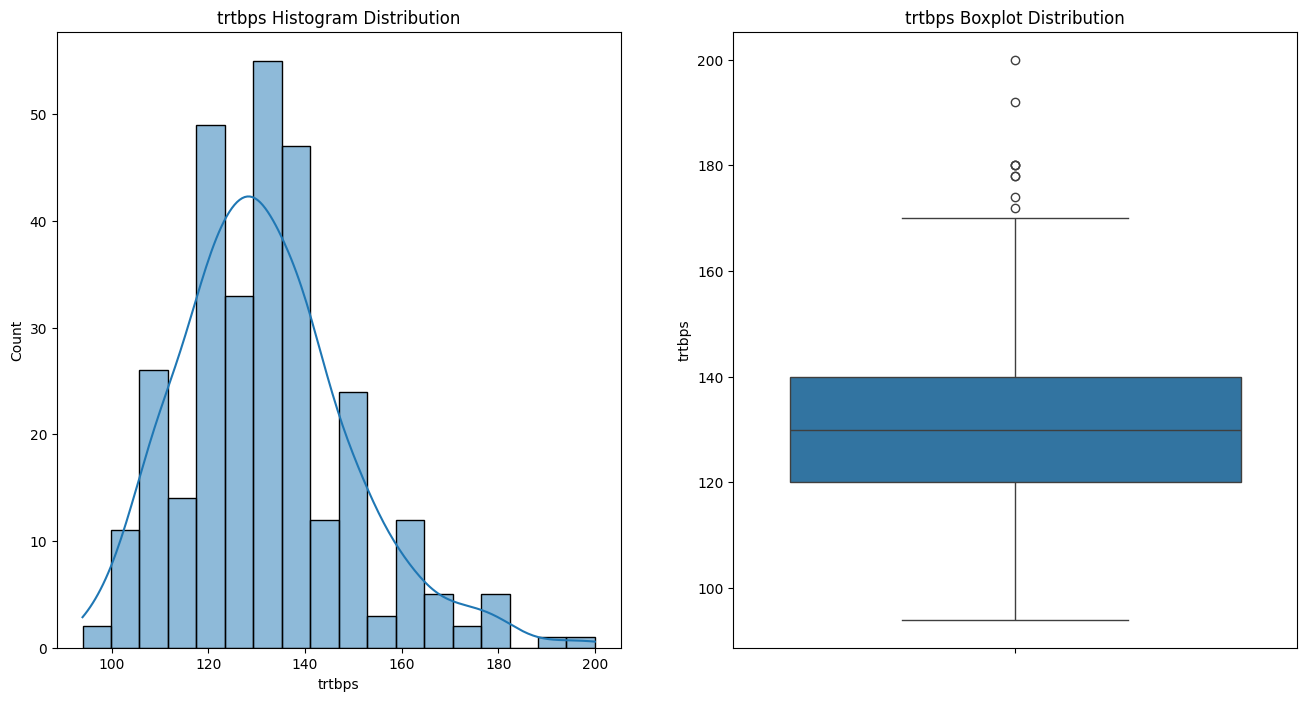

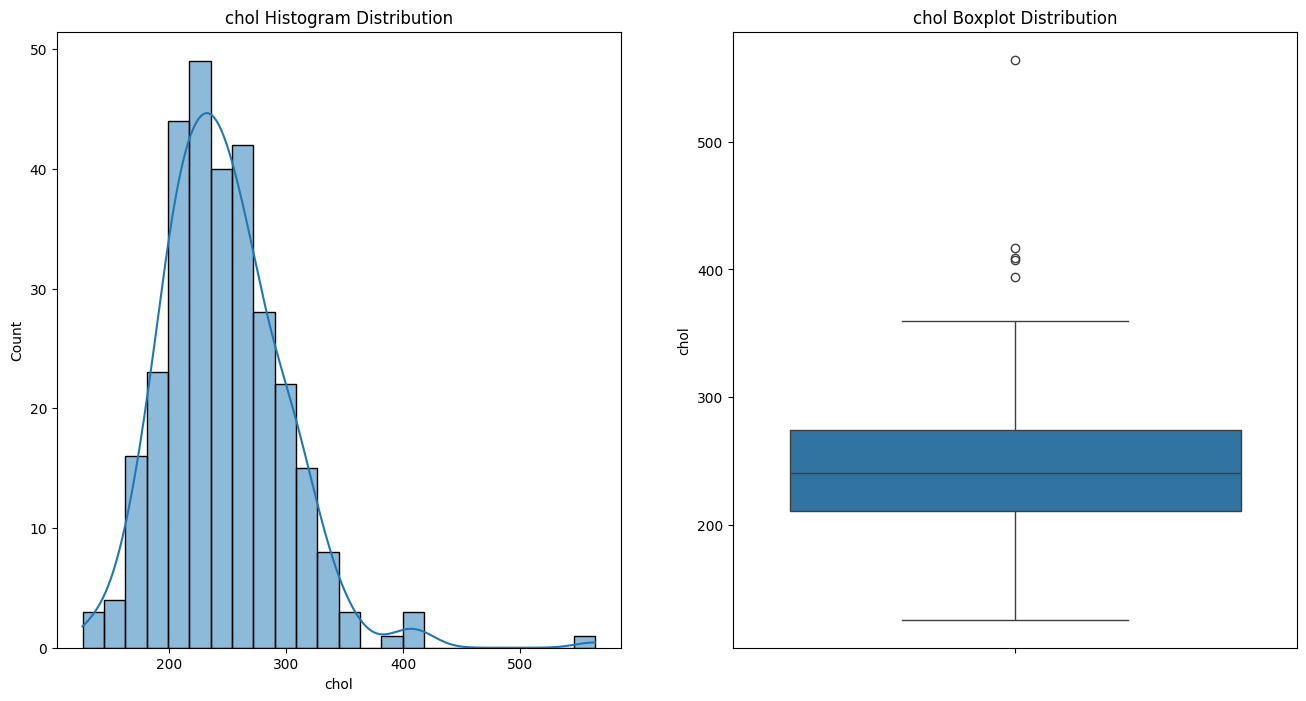

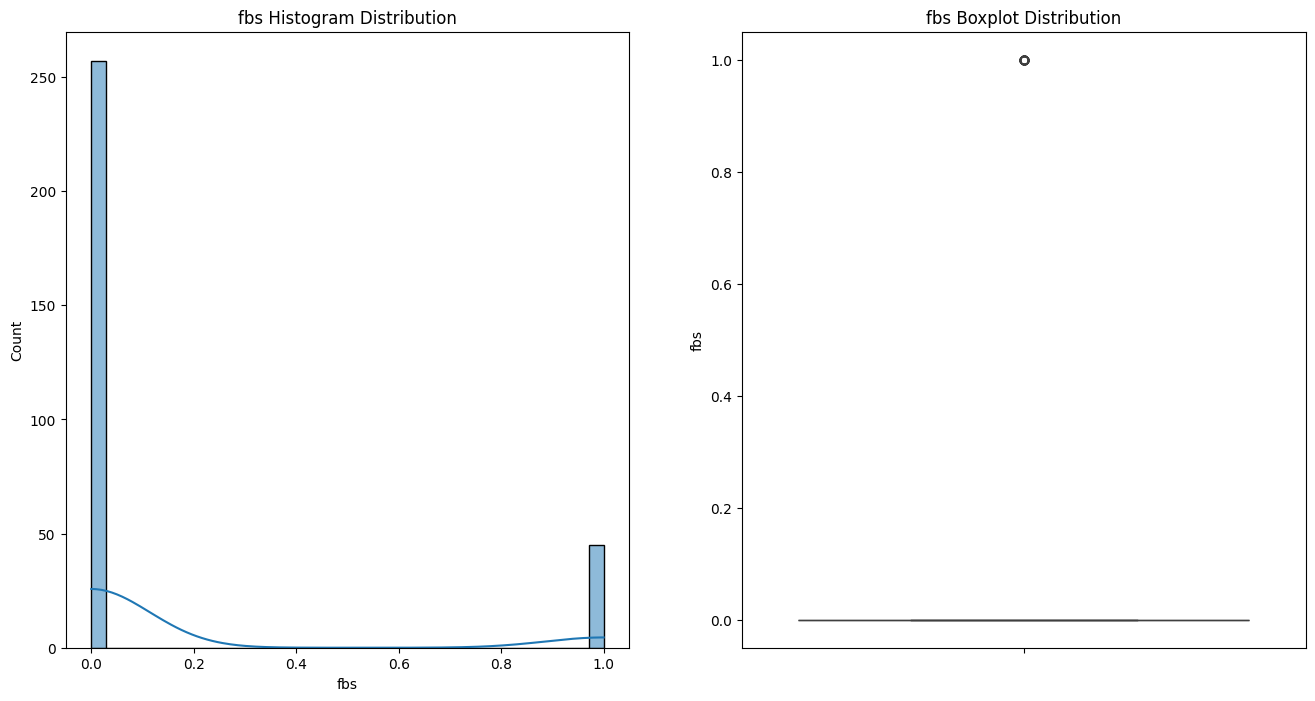

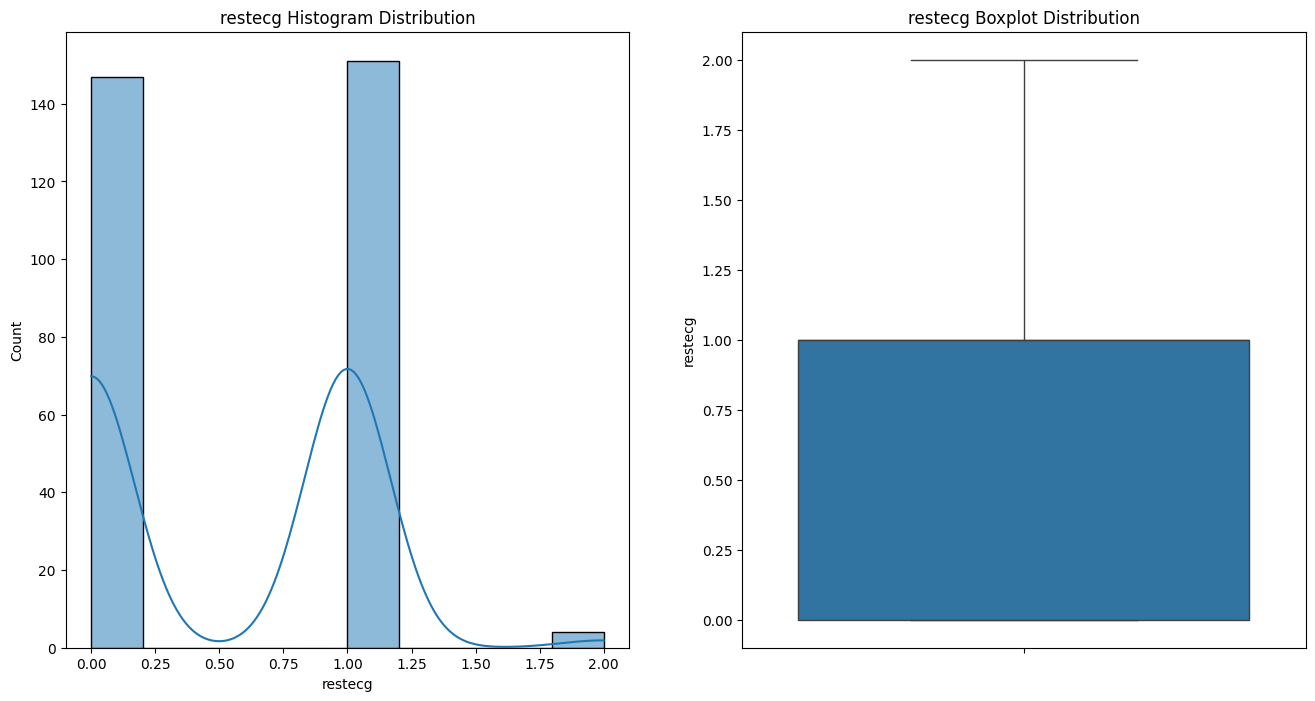

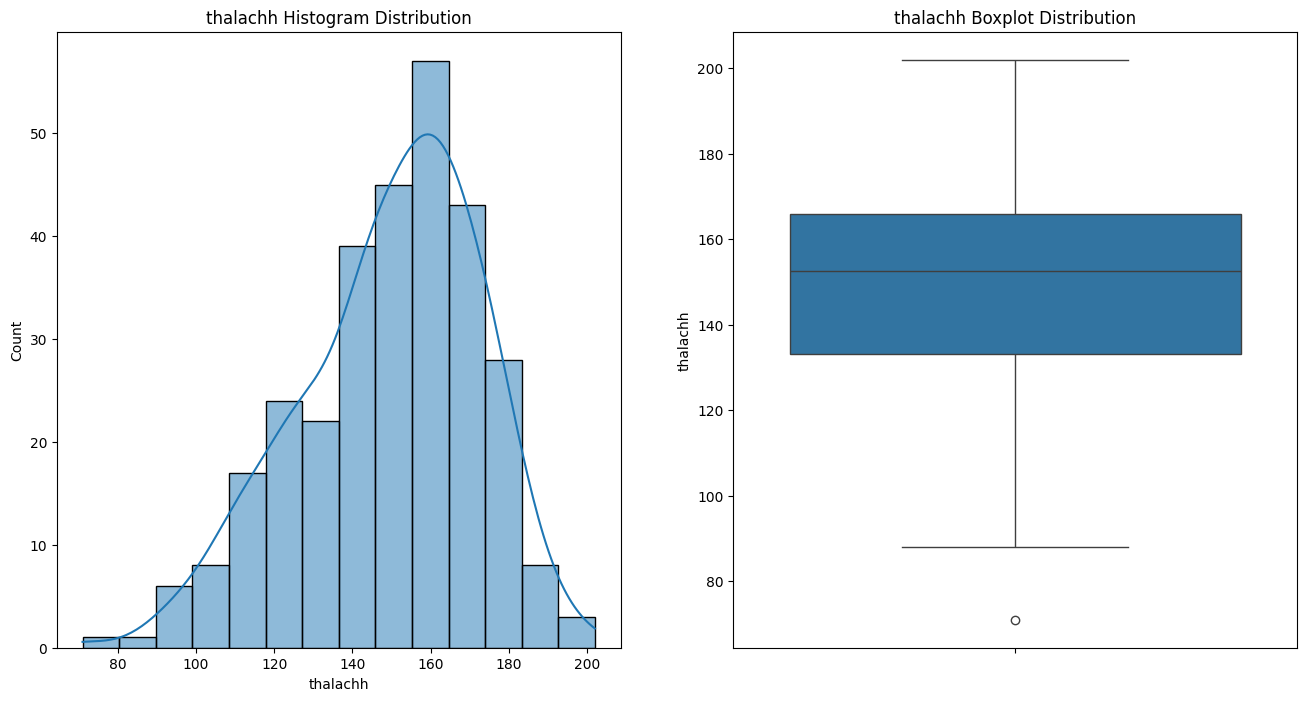

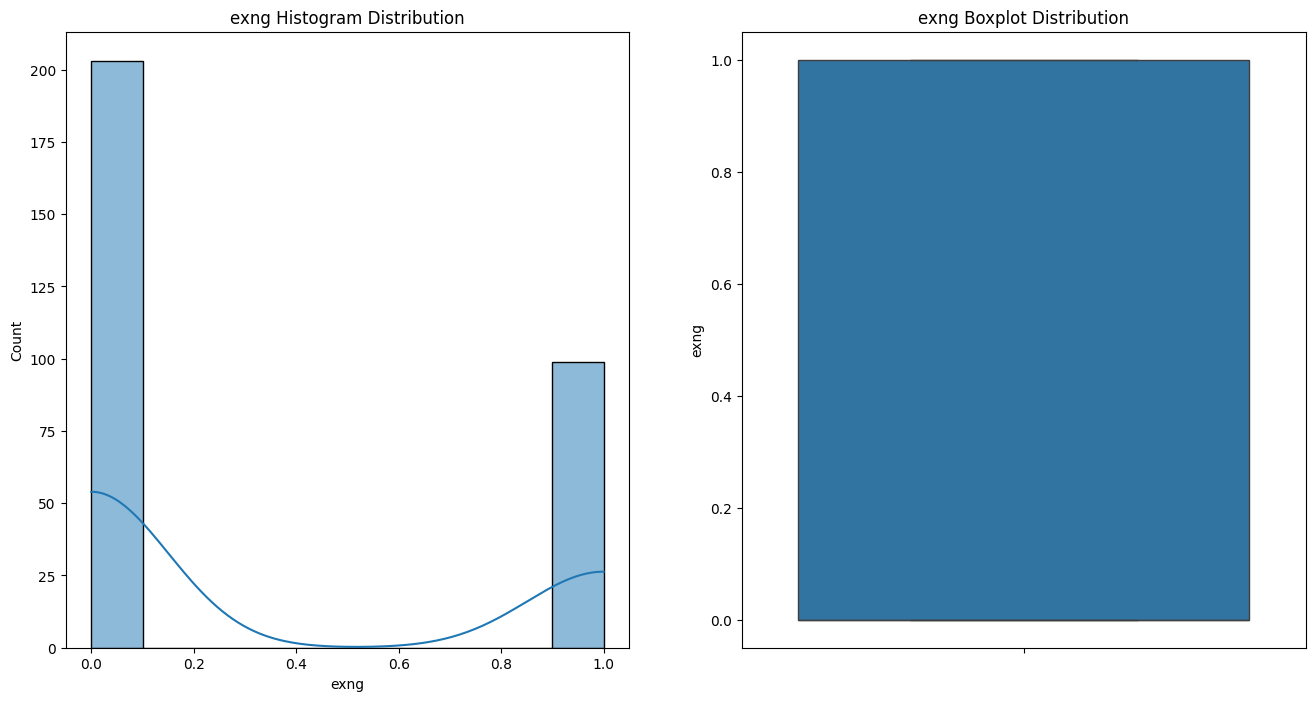

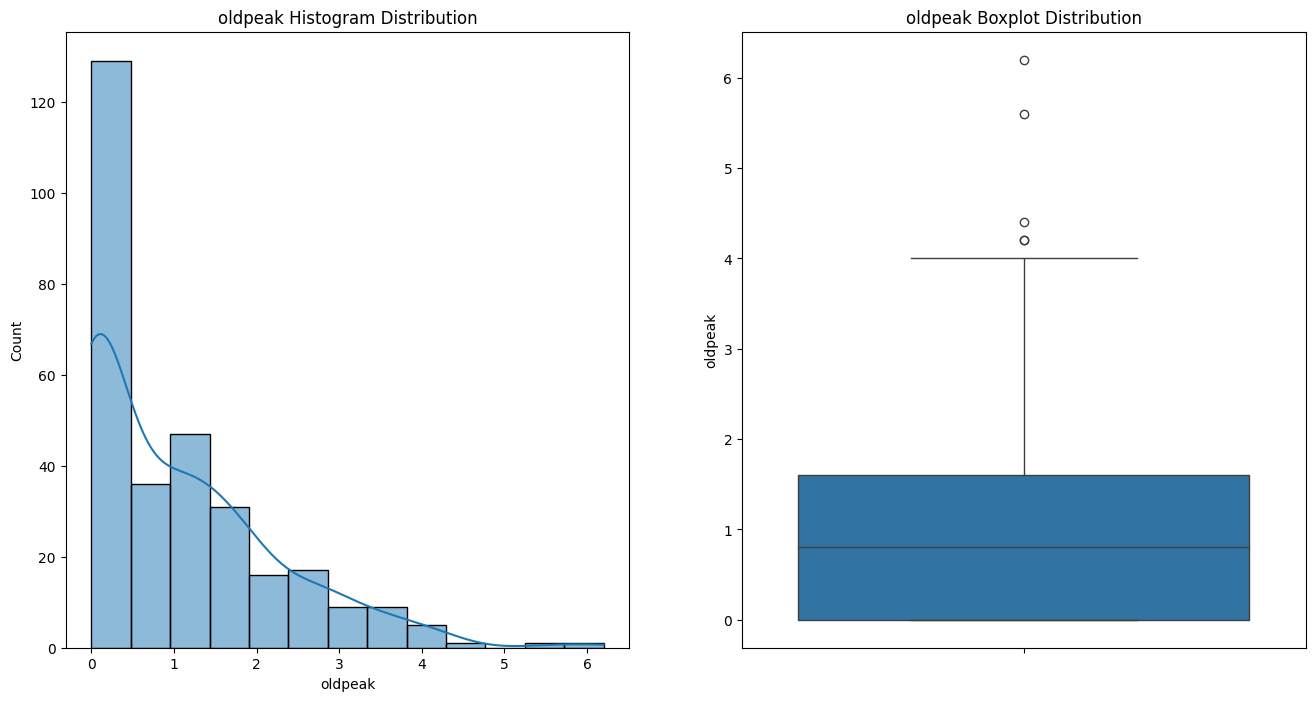

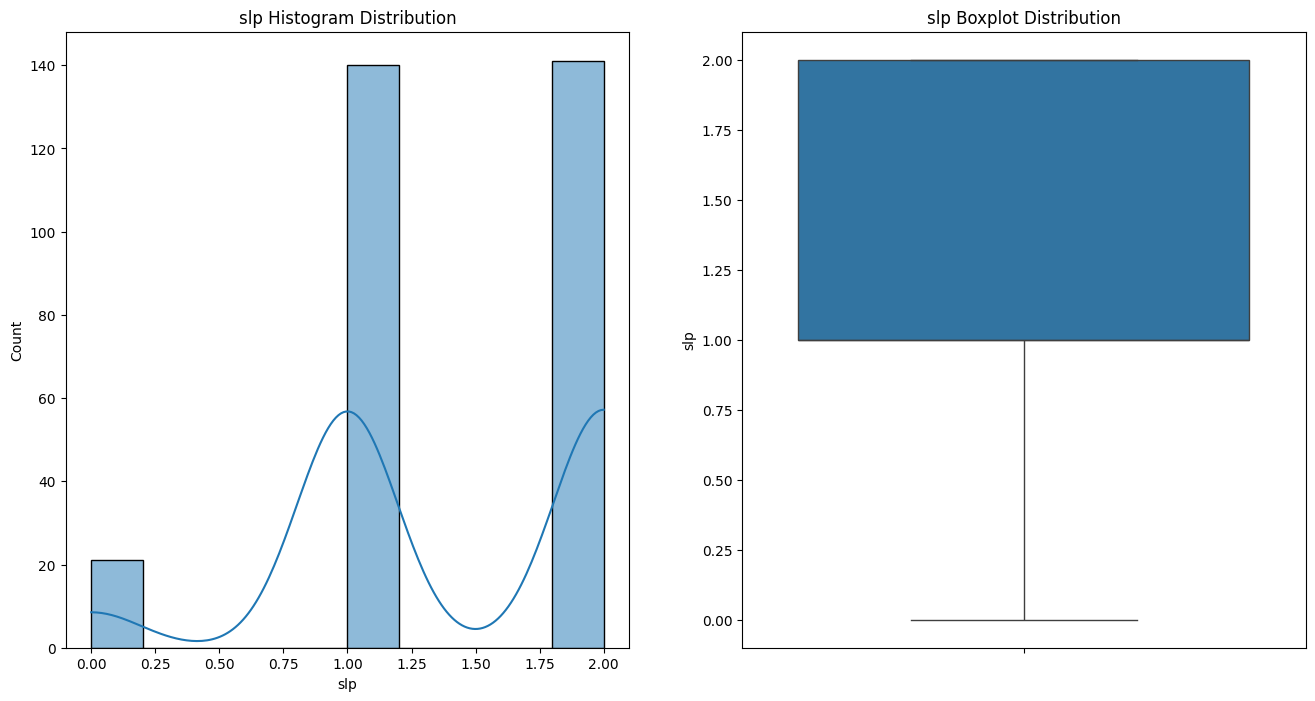

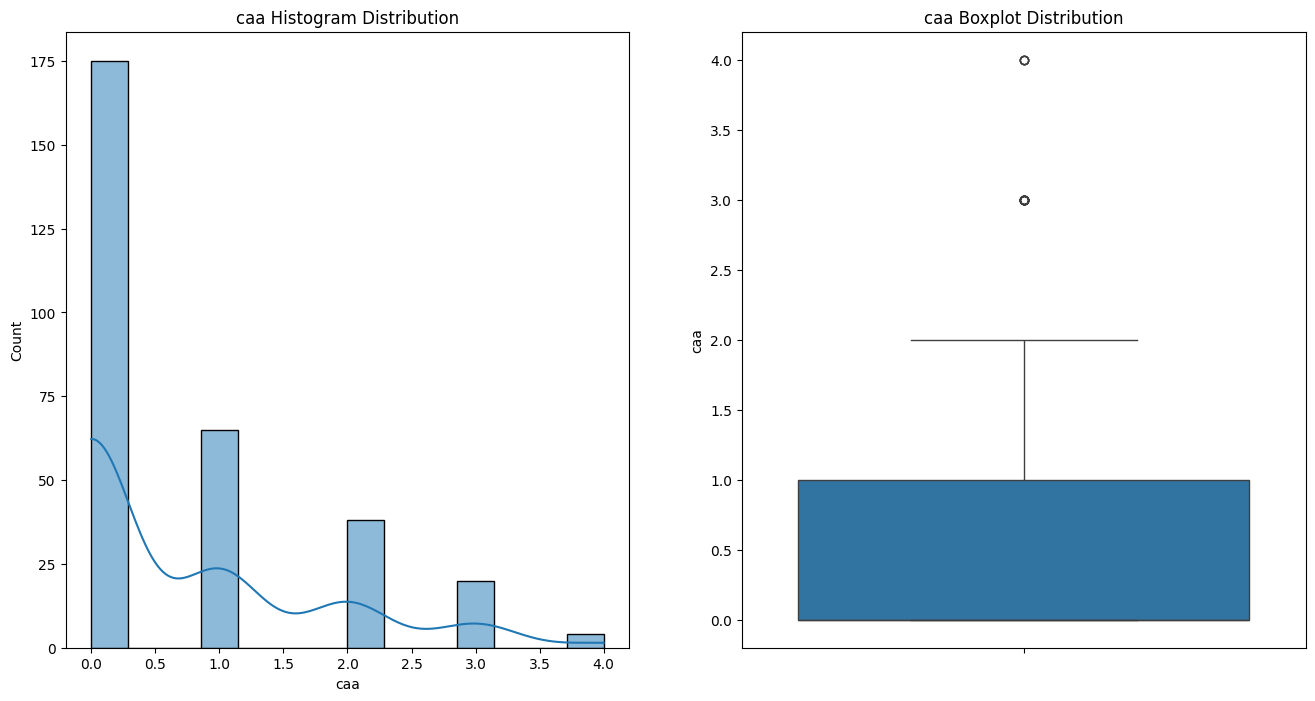

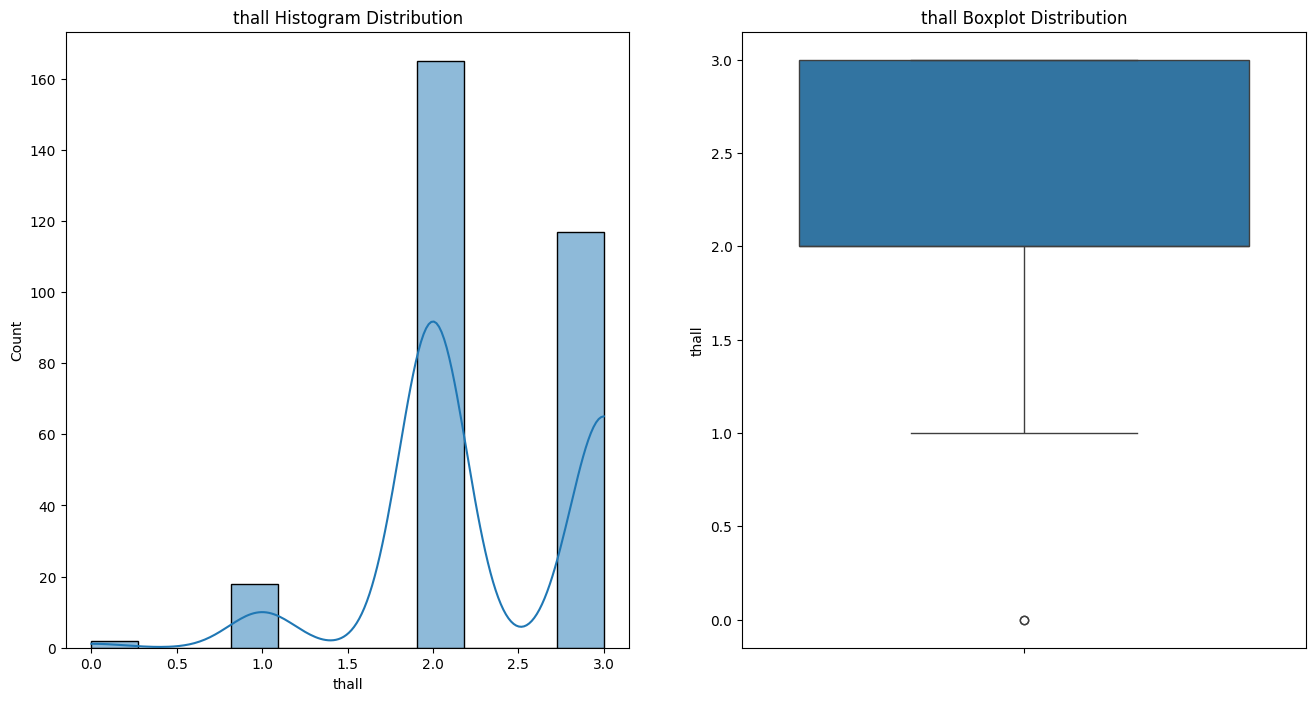

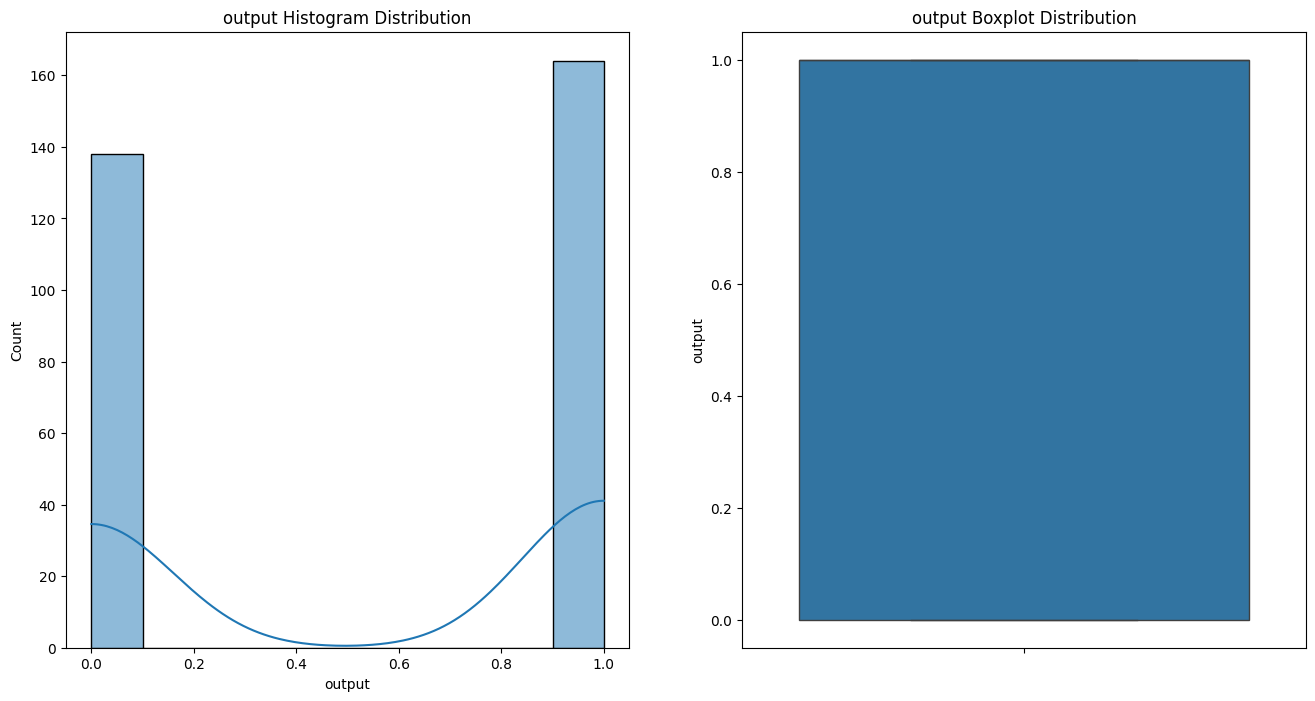

In [53]:
for col in df.select_dtypes(include='number'):
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    sns.histplot(df[col], ax=axes[0], kde=True)
    axes[0].set_title(f"{col} Histogram Distribution")
    
    sns.boxplot(df[col], ax=axes[1])
    axes[1].set_title(f"{col} Boxplot Distribution")

## B. Data Preprocessing

### B.1 Mapping Column Names

In [54]:
column_mapping = {
    'cp'       : 'chest_pain_type', 
    'trtbps'   : 'resting_bp',     
    'chol'     : 'cholesterol',
    'fbs'      : 'fasting_bs',        
    'restecg'  : 'resting_ecg',   
    'thalachh' : 'max_heart_rate',    
    'exng'     : 'exercise_angina',
    'oldpeak'  : 'st_depression',    
    'slp'      : 'st_slope',         
    'caa'      : 'num_major_vessels',
    'thall'    : 'thalassemia',  
    'output'   : 'target'          
}

df = df.rename(columns=column_mapping)

### B.2 Mapping Label

In [55]:
target_mapping = {0: "Healthy", 1: "Heart Disease"}
df['target_sign'] = df['target'].map(target_mapping)

### B.3 Mapping Feature

In [56]:
sex_mapping = {0: "Female", 1: "Male"}
df['sex_sign'] = df['sex'].map(sex_mapping)

## C. Exploratory Data Analysis

### C.1 Univariate Analysis

#### Label Distribution

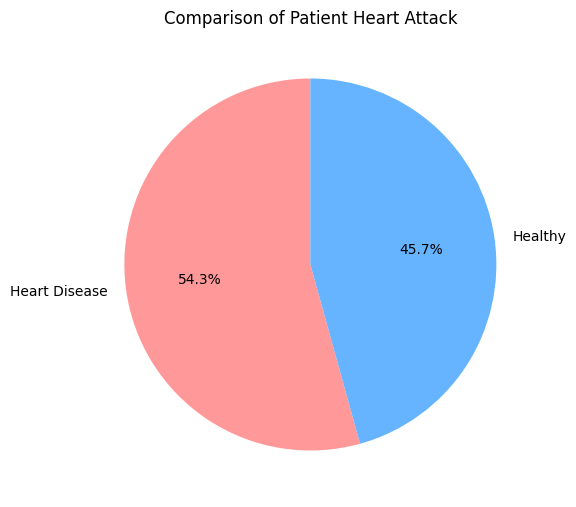

In [57]:
plt.figure(figsize=(6, 8))
df['target_sign'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)
plt.title('Comparison of Patient Heart Attack')
plt.ylabel(None)
plt.show()

#### Numerical & Categorical Features Distribution

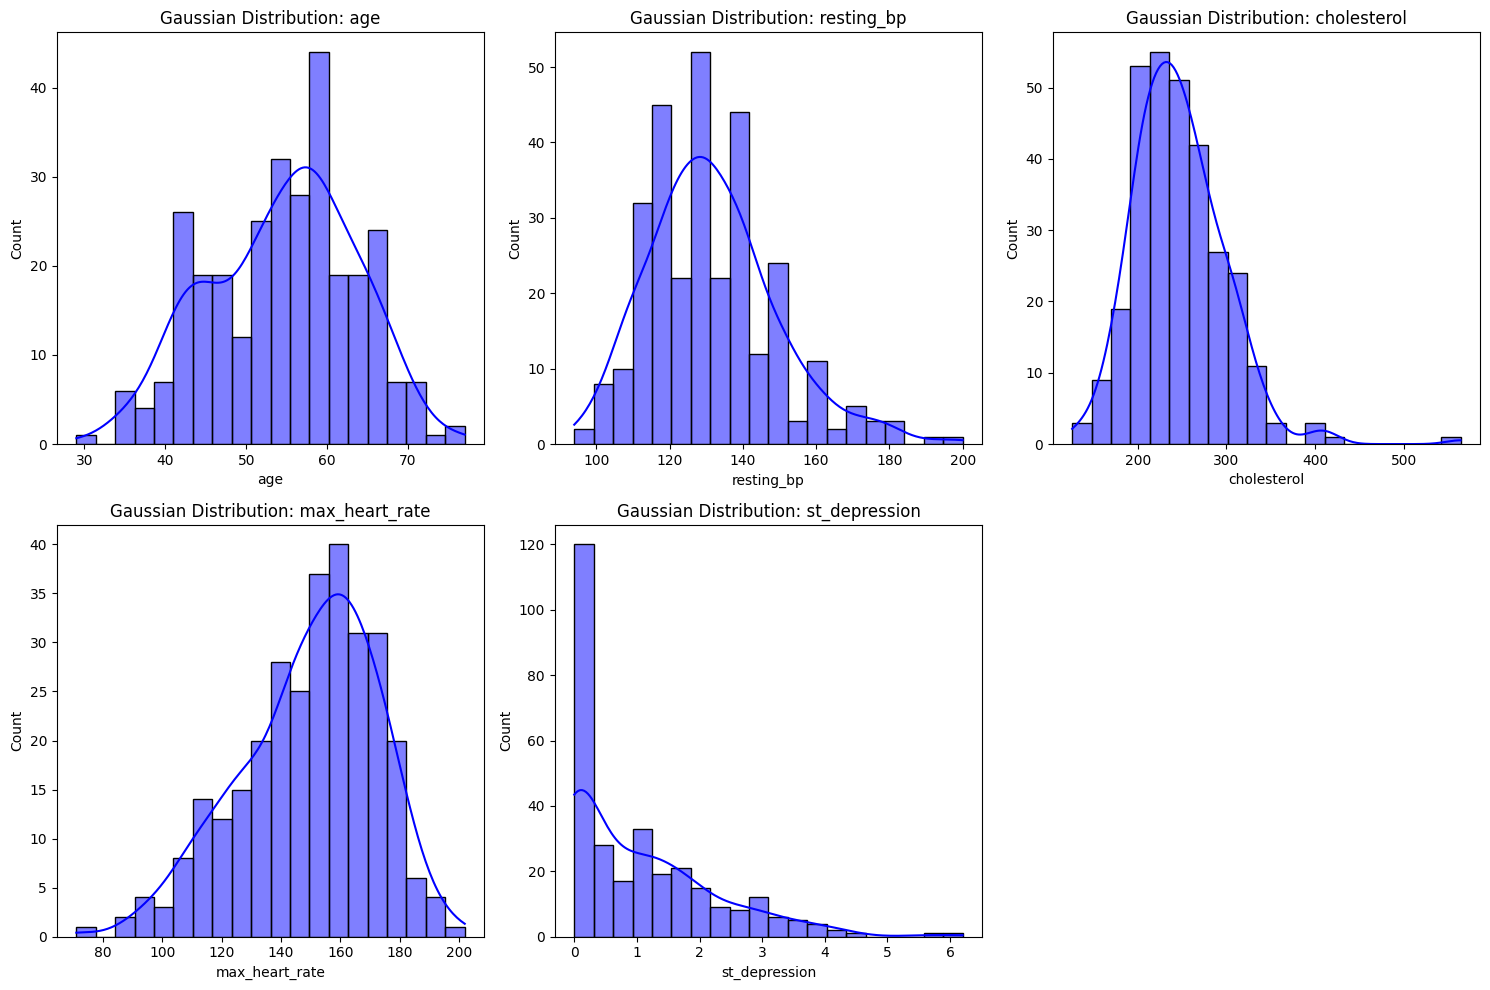

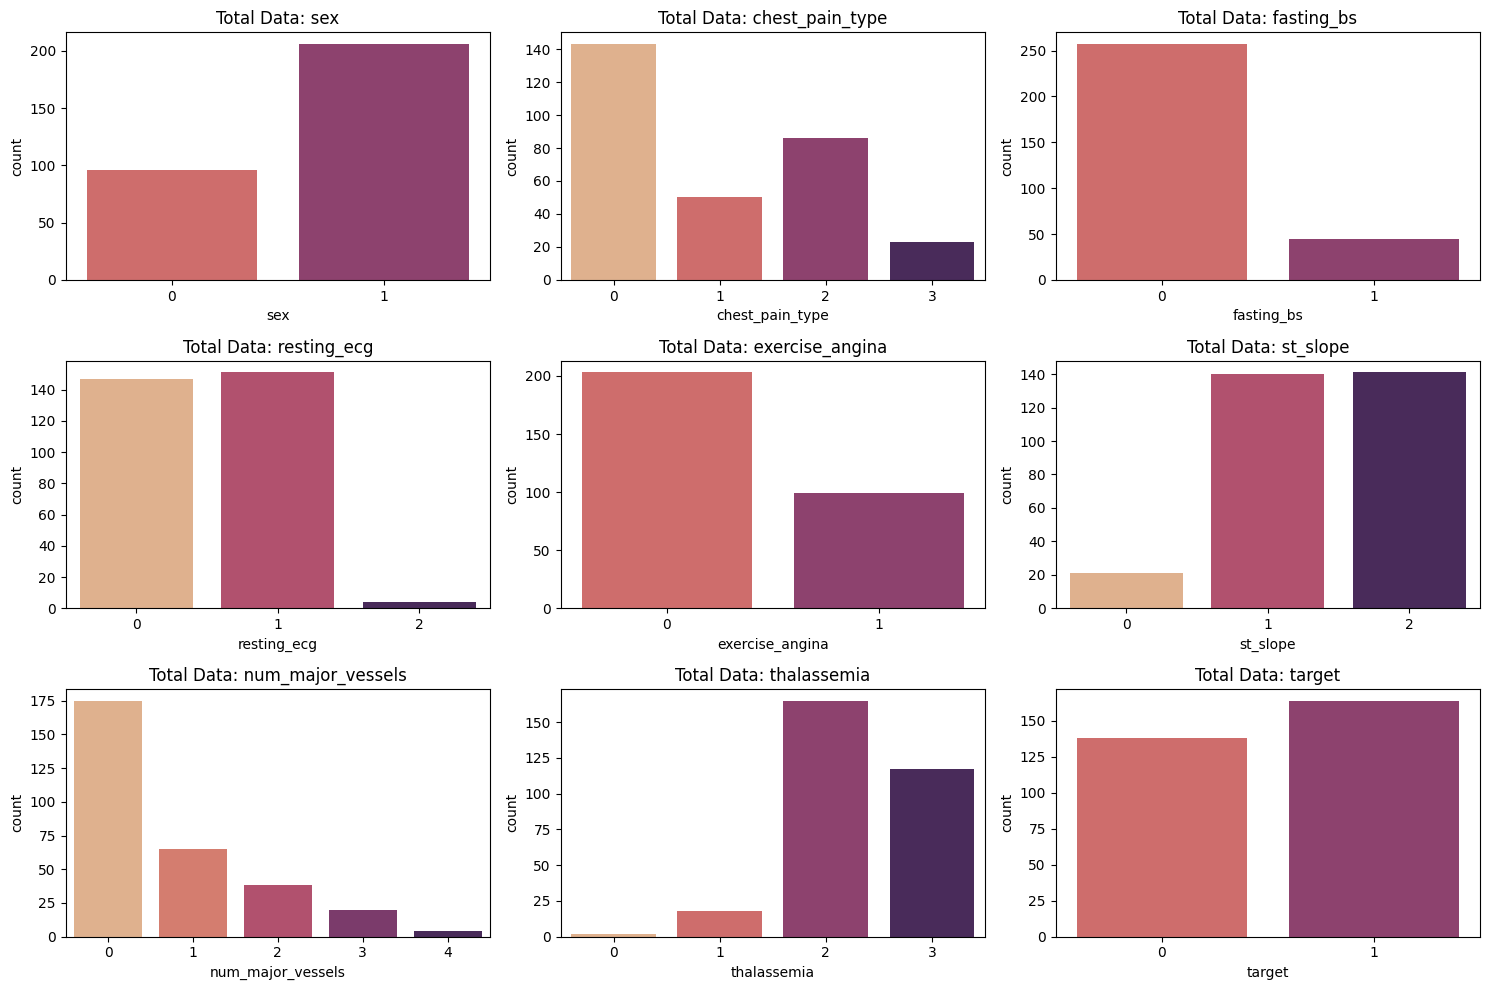

In [58]:
num_cols = ['age', 'resting_bp', 'cholesterol', 'max_heart_rate', 'st_depression']

cat_cols = ['sex', 'chest_pain_type', 'fasting_bs', 'resting_ecg', 
            'exercise_angina', 'st_slope', 'num_major_vessels', 
            'thalassemia', 'target']


# 1. Numeric Visualization (Check Data Distribution Bell)
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True, color='blue', bins=20)
    plt.title(f'Gaussian Distribution: {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

# 2. Categorical Visualization (Check Data Balance)
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=col, hue=col, legend=False, palette='flare')
    plt.title(f'Total Data: {col}')
plt.tight_layout()
plt.show()

### C.2 Bivariate Analysis

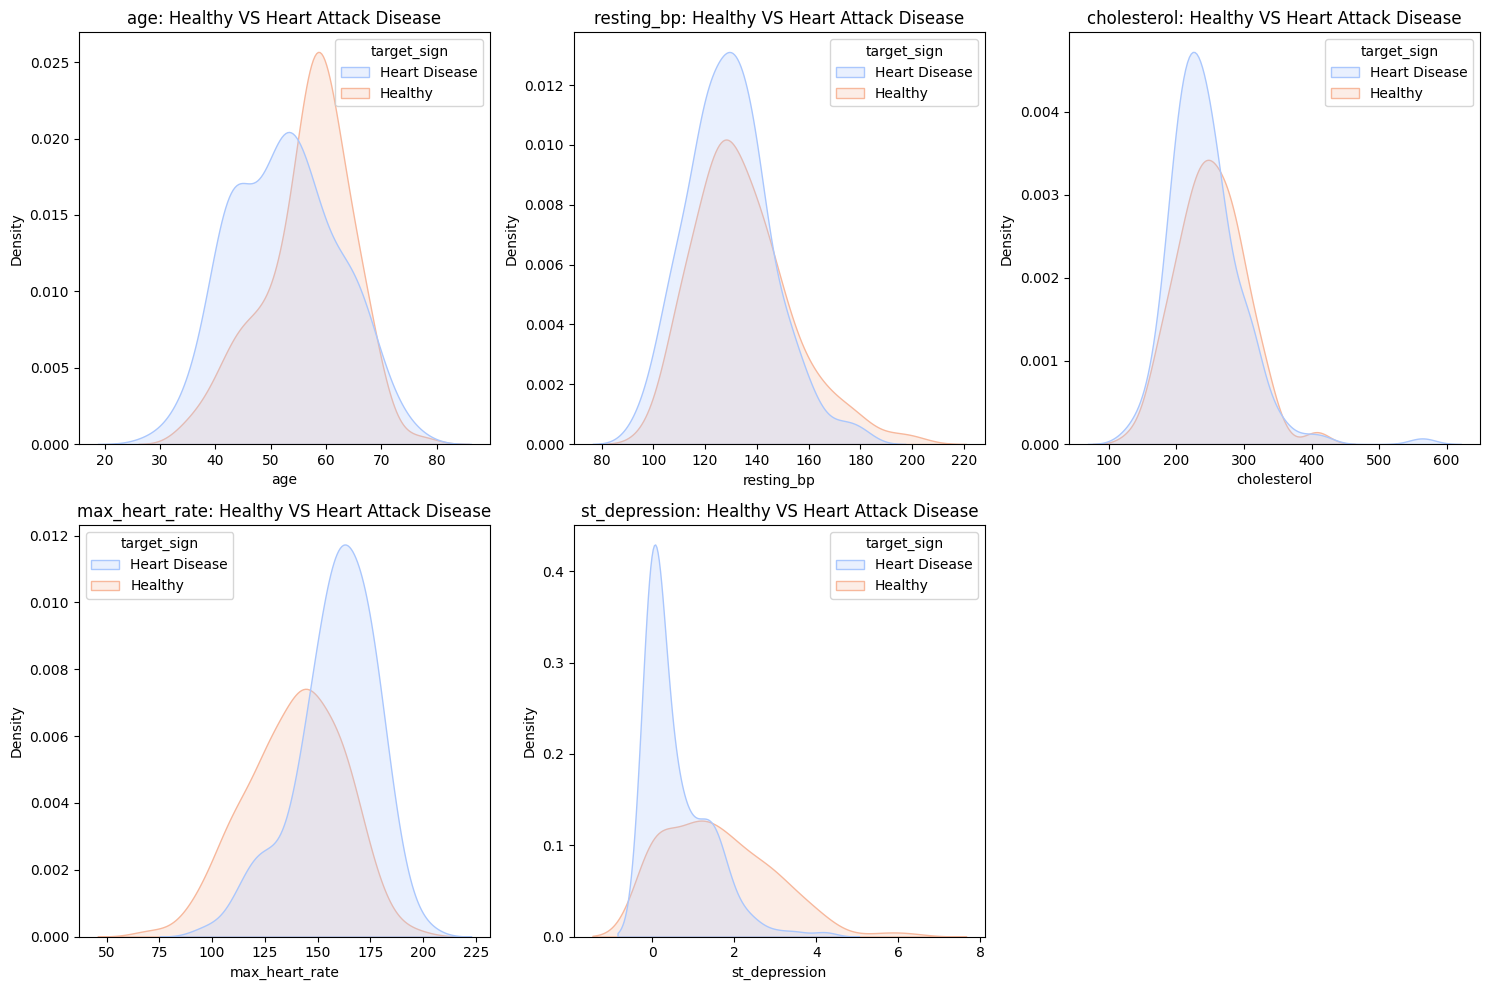

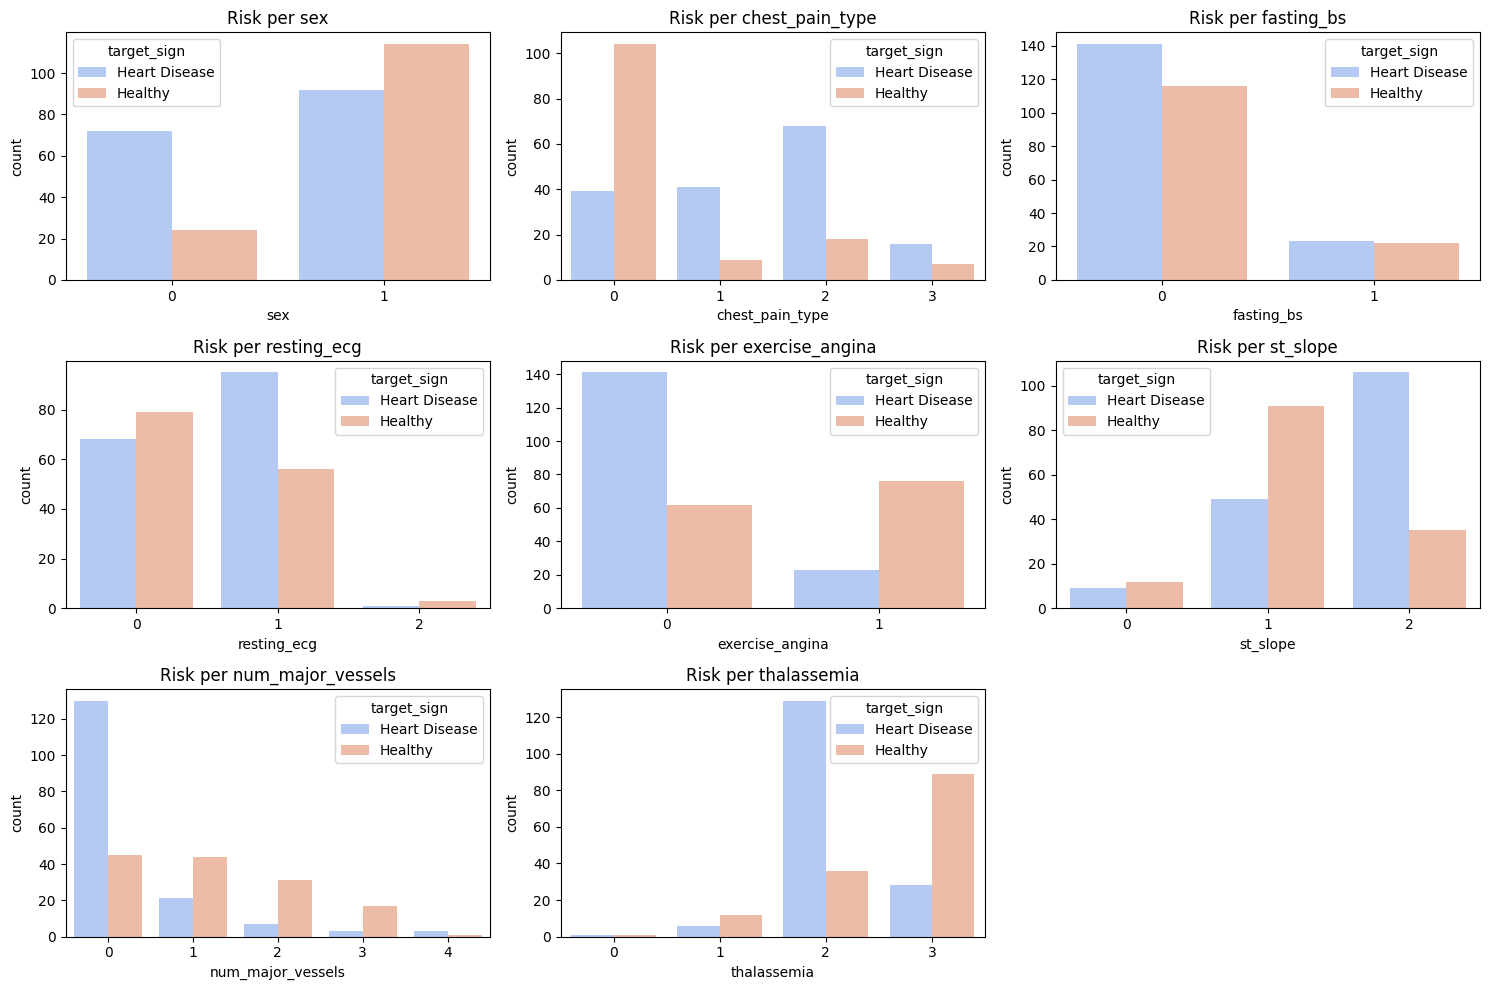

In [59]:
# 1. Numeric vs Target (The "Gaussian Clash")
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(data=df, x=col, hue='target_sign', fill=True, palette='coolwarm')
    plt.title(f'{col}: Healthy VS Heart Attack Disease')
plt.tight_layout()
plt.show()

# 2. Categoric vs Target
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols[:-1]):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=col, hue='target_sign', palette='coolwarm')
    plt.title(f'Risk per {col}')
plt.tight_layout()
plt.show()

### C.3 Multivariate Analysis

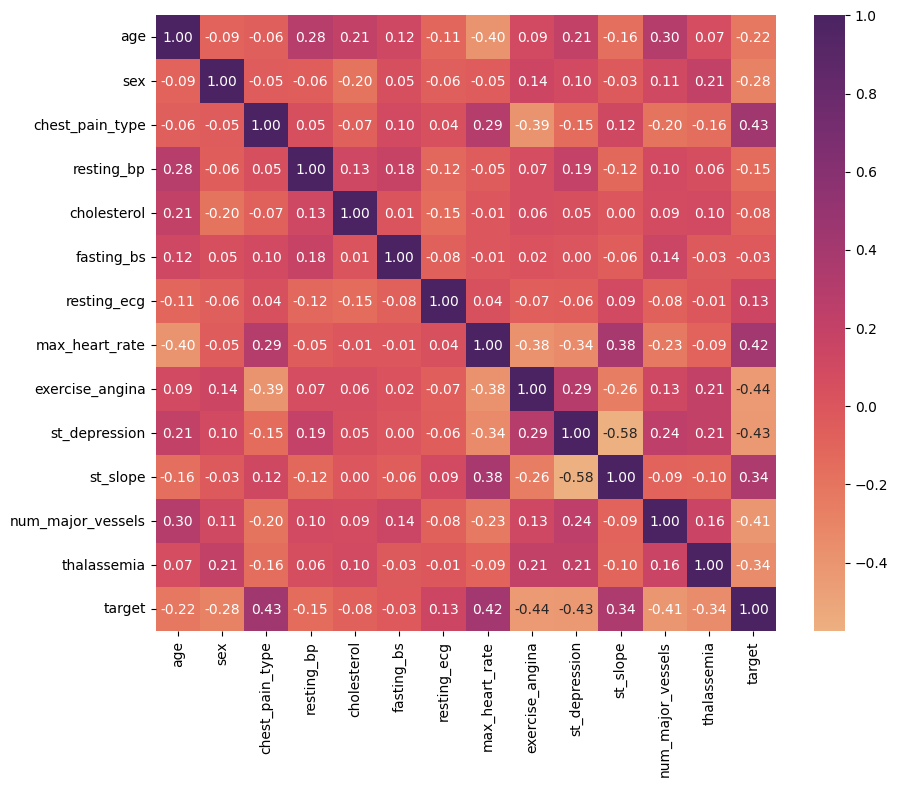

In [60]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='flare', fmt='.2f')
plt.show()

## D. Modelling

### D.1 Defining X (Features) and y (Target) Variables

In [61]:
X_data = df.select_dtypes(include=['number']).drop(columns=['target'])
y_data = df['target']

### D.2 Splitting Train Data and Test Data (80:20)

In [62]:
def stratified_split(x_data, y_data, train_size = 0.8, random_state = 42):
    np.random.seed(random_state)
    
    x_train_list, x_test_list = [], []
    y_train_list, y_test_list = [], []
    
    for class_value in np.unique(y_data):
        class_idx = np.where(y_data == class_value)[0]
        
        idx = np.random.permutation(class_idx)
        split_ratio = int(len(idx) * train_size)
        
        x_train_list.append(x_data.iloc[idx[:split_ratio]])
        x_test_list.append(x_data.iloc[idx[split_ratio:]])
        y_train_list.append(y_data.iloc[idx[:split_ratio]])
        y_test_list.append(y_data.iloc[idx[split_ratio:]])
        
    x_train = pd.concat(x_train_list).reset_index(drop = True)
    x_test = pd.concat(x_test_list).reset_index(drop = True)
    y_train = pd.concat(y_train_list).reset_index(drop = True)
    y_test = pd.concat(y_test_list).reset_index(drop = True)
    
    return x_train, x_test, y_train, y_test
X_train, X_test, y_train, y_test = stratified_split(X_data, y_data)

### D.3 Feature Scaling

#### Robust Scale Continous Data (Non-Categorical)

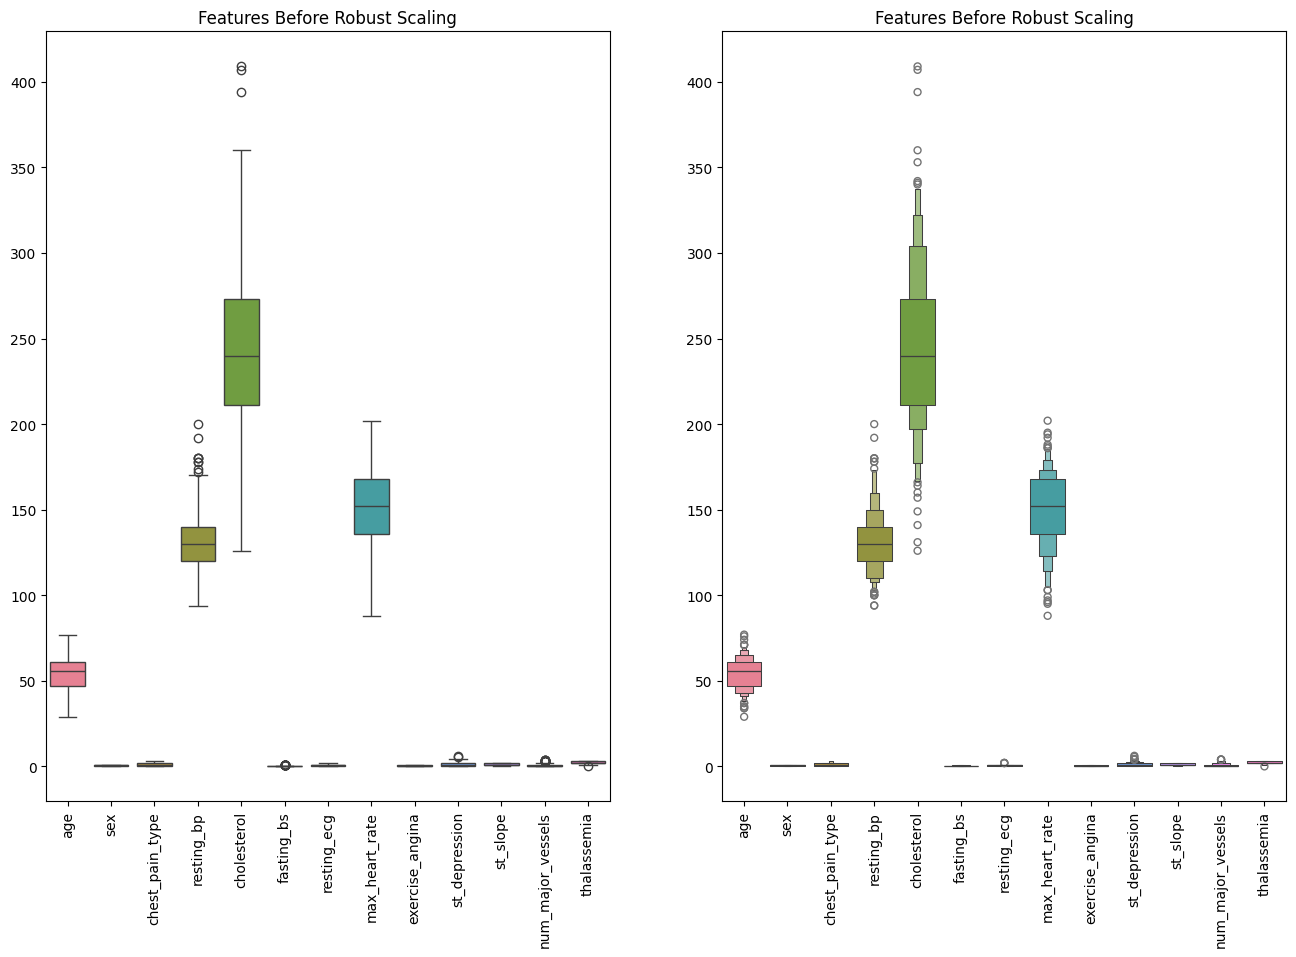

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(16, 10))

sns.boxplot(X_train, ax=axes[0])
axes[0].set_title("Features Before Robust Scaling")
axes[0].tick_params(axis='x', rotation=90) 

sns.boxenplot(X_train, ax=axes[1])
axes[1].set_title("Features Before Robust Scaling")
axes[1].tick_params(axis='x', rotation=90) 

In [64]:
# 1. Calculate Statistics (With Only Train Data)
# Find Median & IQR
median = X_train.median(axis=0)
Q1 = X_train.quantile(0.25, axis=0)
Q3 = X_train.quantile(0.75, axis=0)
IQR = Q3 - Q1

# 2. Scale Train & Test Data
X_train = (X_train - median) / IQR
X_test = (X_test - median) / IQR

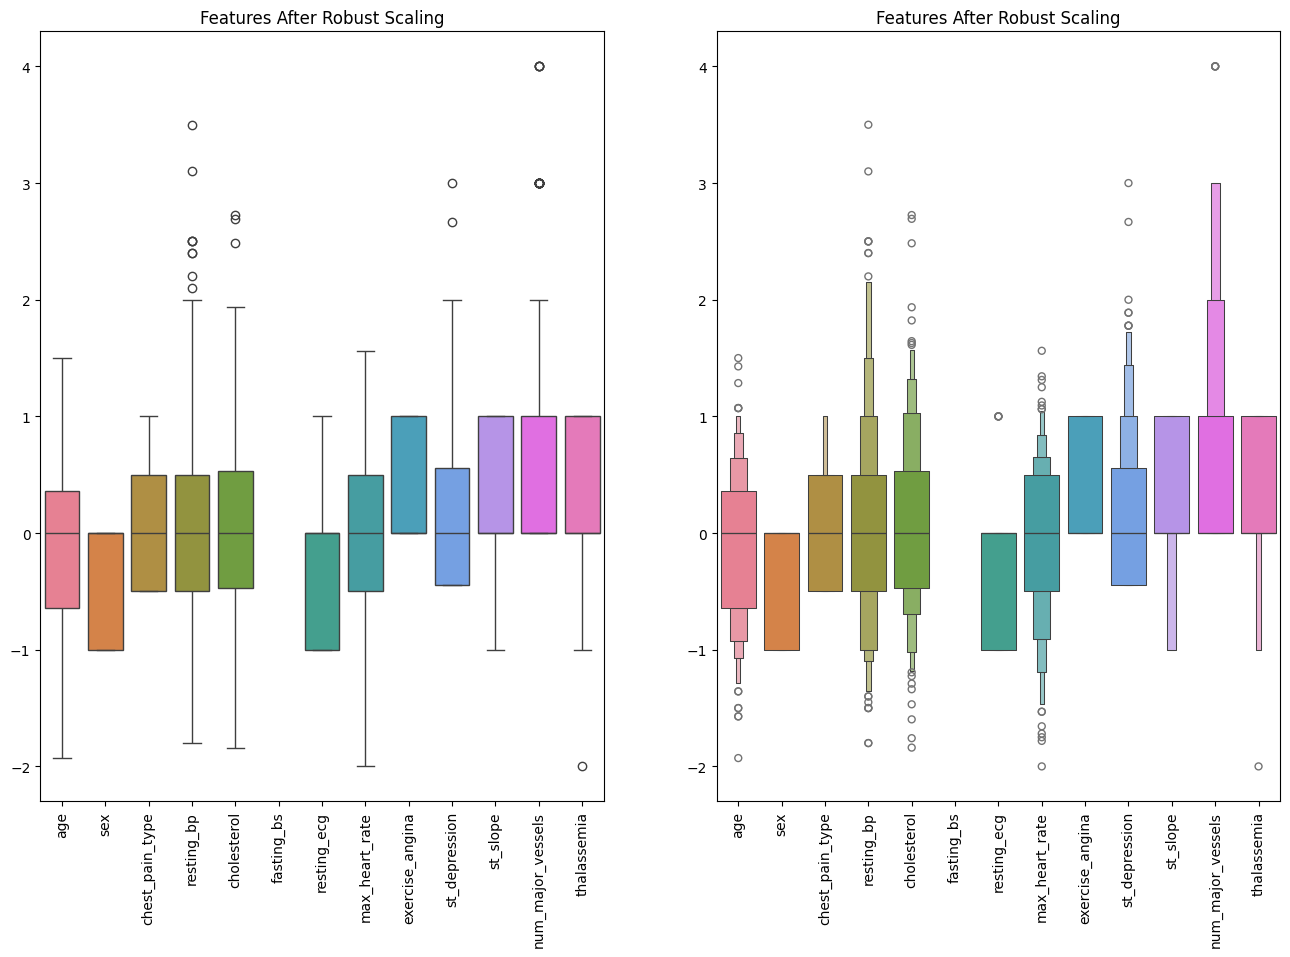

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(16, 10))

sns.boxplot(X_train, ax=axes[0])
axes[0].set_title("Features After Robust Scaling")
axes[0].tick_params(axis='x', rotation=90) 

sns.boxenplot(X_train, ax=axes[1])
axes[1].set_title("Features After Robust Scaling")
axes[1].tick_params(axis='x', rotation=90) 

### D.4 Naive Bayes Gaussian

In [96]:
import numpy as np

class NaiveBayesGaussian:
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        self._classes = np.unique(y)
        n_classes = len(self._classes)
        n_samples, n_features = X.shape

        # Siapkan container statistik
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            # VAR: Epsilon di sini OK (biar ga bagi nol)
            self._var[idx, :] = X_c.var(axis=0) + 1e-2
            self._priors[idx] = X_c.shape[0] / float(n_samples)

    # --- FITUR BARU: LOG-LIKELIHOOD (SOLUSI UNDERFLOW) ---
    # Kita hapus fungsi _pdf dan ganti dengan ini
    def _calculate_log_likelihood(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        # Rumus Matematika Log-Normal (Jauh lebih stabil)
        log_exponent = -0.5 * np.log(2 * np.pi * var)
        log_variance = -((x - mean) ** 2) / (2 * var)
        return log_exponent + log_variance

    def predict_proba(self, X):
        X = np.array(X)
        y_probs = []
        
        for x in X:
            posteriors = []
            for idx, c in enumerate(self._classes):
                # 1. Ambil Log-Prior
                prior = np.log(self._priors[idx])
                
                # 2. Ambil Log-Likelihood (Pakai fungsi baru!)
                log_likelihoods = self._calculate_log_likelihood(idx, x)
                
                # 3. Jumlahkan
                class_posterior = prior + np.sum(log_likelihoods)
                posteriors.append(class_posterior)
            
            # --- SIGMOID TRICK ---
            # Ubah Log-Score jadi Probabilitas %
            try:
                # Clip biar gak overflow
                diff = np.clip(posteriors[0] - posteriors[1], -100, 100) 
                prob_sick = 1 / (1 + np.exp(diff))
            except:
                prob_sick = 0.5 
                
            y_probs.append(prob_sick)
            
        return np.array(y_probs)

    def predict(self, X, threshold=0.5):
        probs = self.predict_proba(X)
        return (probs >= threshold).astype(int)

### D.5 Naive Bayes Gaussian Validation Curve (Finding Best Gap)

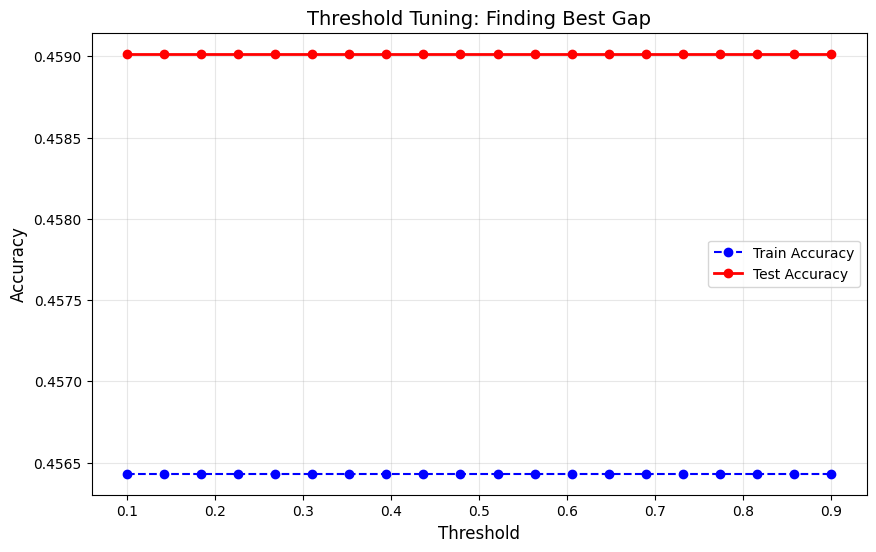

In [97]:
thresholds = np.linspace(0.1, 0.9, 20) #  Threshold 10% - 90%
train_accuracies = []
test_accuracies = []

# Train
nbg = NaiveBayesGaussian()
nbg.fit(X_train, y_train)

# Take Probability
probs_train = nbg.predict_proba(X_train)
probs_test = nbg.predict_proba(X_test)

for t in thresholds:
    # Train Acc
    pred_train = (probs_train >= t).astype(int)
    acc_train = np.mean(pred_train == y_train.values)
    train_accuracies.append(acc_train)
    
    # Test Acc
    pred_test = (probs_test >= t).astype(int)
    acc_test = np.mean(pred_test == y_test.values)
    test_accuracies.append(acc_test)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(thresholds, train_accuracies, marker='o', linestyle='--', color='blue', label='Train Accuracy')
plt.plot(thresholds, test_accuracies, marker='o', linewidth=2, color='red', label='Test Accuracy')

plt.title('Threshold Tuning: Finding Best Gap', fontsize=14)
plt.xlabel('Threshold', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

### D.6 Naive Bayes Gaussian Prediction

In [93]:
nbg = NaiveBayesGaussian()
nbg.fit(X_train, y_train)
test_predictions = nbg.predict(X_test, threshold=0.5)
train_predictions = nbg.predict(X_train, threshold=0.5)

## E. Evaluation

### E.1 Model Accuracy

#### Test Accuracy

In [94]:
test_accuracy = np.mean(test_predictions == y_test)
print(f"Accuracy (Test): {test_accuracy:.3f}")

Accuracy (Test): 0.459


#### Train Accuracy

In [70]:
train_accuracy = np.mean(train_predictions == y_train.values)
print(f"Accuracy (Train): {train_accuracy:.3f}") 

Accuracy (Train): 0.456


### E.2 Confusion Matrix

In [71]:
pred_array = np.array(test_predictions)
test_array = np.array(y_test)

TP = np.sum((pred_array == 1) & (test_array == 1))
FP = np.sum((pred_array == 1) & (test_array == 0))
FN = np.sum((pred_array == 0) & (test_array == 1))
TN = np.sum((pred_array == 0) & (test_array == 0))

print(f"True Positives: {TP}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")
print(f"True Negatives: {TN}")

True Positives: 0
False Positives: 0
False Negatives: 33
True Negatives: 28


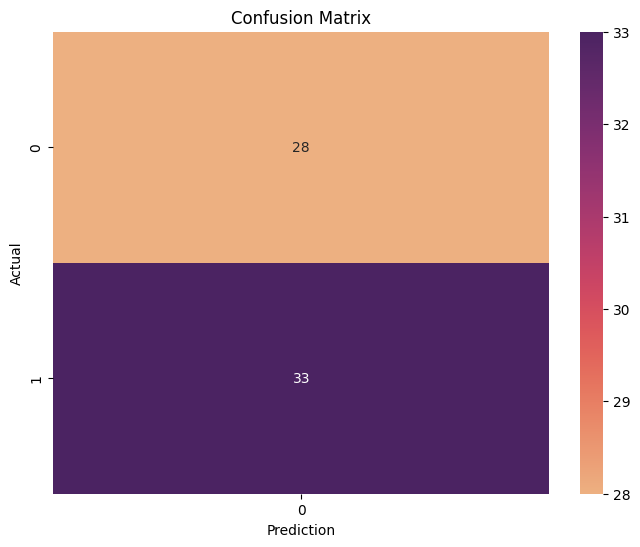

Class: Negative
True Positives: 28
False Positives: 33
False Negatives: 0
True Negatives: 0



In [72]:
confusion_matrix = pd.crosstab(y_test, test_predictions, rownames=['Actual'], colnames=['Prediction'])
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix, annot=True, cmap='flare', fmt='d')
plt.title("Confusion Matrix")
plt.show()

cm_array = confusion_matrix.values
TP = np.diag(cm_array)
FP = np.sum(cm_array, axis=0) - TP
FN = np.sum(cm_array, axis=1) - TP
TN = np.sum(cm_array) - (TP + FP + FN)

class_names = confusion_matrix.columns
for i, name in enumerate(class_names):
    if name == 0:
        classes = "Negative"
    else:
        classes = "Positive"
        
    print(f"Class: {classes}")
    print(f"True Positives: {TP[i]}")
    print(f"False Positives: {FP[i]}")
    print(f"False Negatives: {FN[i]}")
    print(f"True Negatives: {TN[i]}\n")

### E.3 Precision

In [100]:
precision = TP / (TP + FP)
precision = np.mean(precision)
print(f"{precision}")

nan


C:\Users\nahls\AppData\Local\Temp\ipykernel_26108\341316165.py:1: RuntimeWarning: invalid value encountered in scalar divide
  precision = TP / (TP + FP)


### E.4 Recall

In [101]:
recall = TP / (TP + FN)
recall = np.mean(recall)
print(f"{recall}")

nan


C:\Users\nahls\AppData\Local\Temp\ipykernel_26108\2423363723.py:1: RuntimeWarning: invalid value encountered in divide
  recall = TP / (TP + FN)


### E.5 F-1 Score

In [102]:
f1 = 2 * (precision * recall) / (precision + recall)
print(f"{f1}")

nan


### E.6 ROC-AUC Visualization

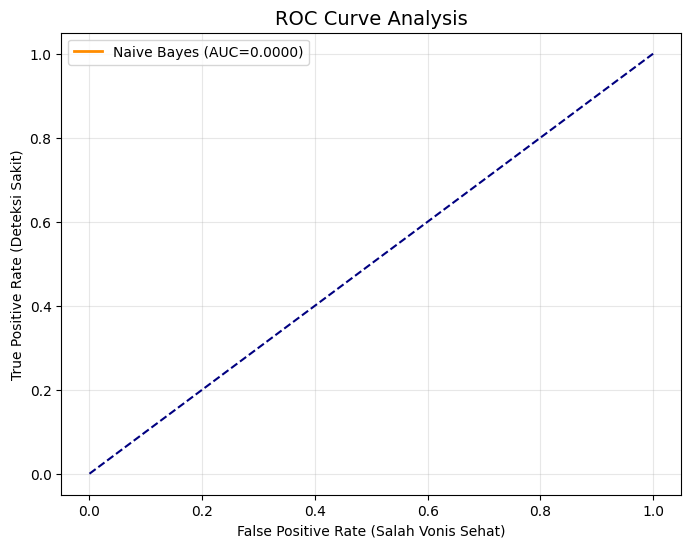

In [104]:
# --- LOGIC ROC-AUC MANUAL ---
tpr_list = []
fpr_list = []

# Kita pakai probabilitas dari NBG tadi
y_probs = probs_test # Dari step sebelumnya
thresholds_roc = np.linspace(0, 1.01, 50) 

P = np.sum(y_test == 1) # Total Pasien Sakit Asli
N = np.sum(y_test == 0) # Total Pasien Sehat Asli

for t in thresholds_roc:
    y_pred_temp = (y_probs >= t).astype(int)
    
    TP = np.sum((y_pred_temp == 1) & (y_test == 1))
    FP = np.sum((y_pred_temp == 1) & (y_test == 0))
    
    tpr_list.append(TP / P) if P > 0 else tpr_list.append(0)
    fpr_list.append(FP / N) if N > 0 else fpr_list.append(0)

# Hitung Luas (Trapezoid Rule)
auc_score = np.trapezoid(tpr_list[::-1], fpr_list[::-1]) # Dibalik biar urut naik

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr_list, tpr_list, color='darkorange', linewidth=2, label=f'Naive Bayes (AUC={abs(auc_score):.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title('ROC Curve Analysis', fontsize=14)
plt.xlabel('False Positive Rate (Salah Vonis Sehat)')
plt.ylabel('True Positive Rate (Deteksi Sakit)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### E.7 Model Evaluation (Visual)

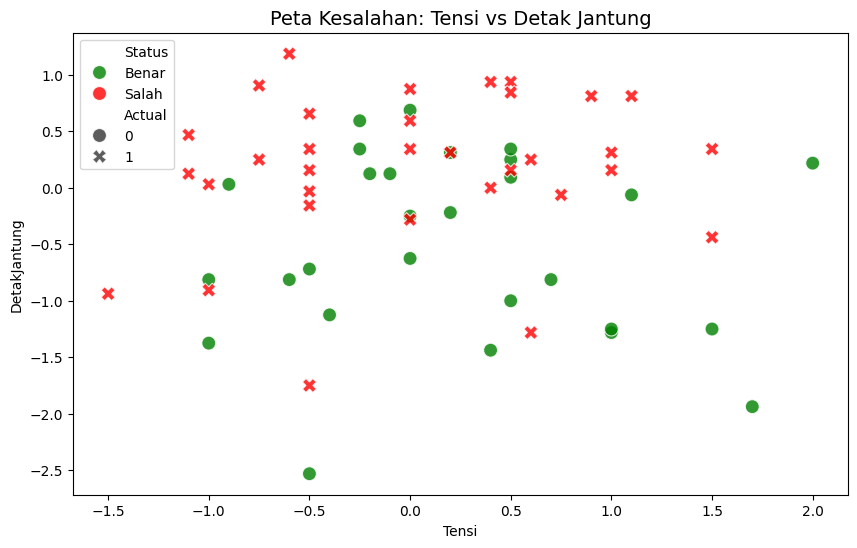

In [ ]:
# Pastikan X_test_scaled bentuknya DataFrame biar bisa dipanggil kolomnya
X_test_df = pd.DataFrame(X_test, columns=X_test.columns)

# Threshold terbaik misal 0.5 (Sesuaikan sama hasil grafik 1 tadi)
best_threshold = 0.5
final_preds = (probs_test >= best_threshold).astype(int)

plot_data = pd.DataFrame({
    'Tensi': X_test_df['resting_bp'], 
    'DetakJantung': X_test_df['max_heart_rate'],
    'Actual': y_test.values,
    'Prediction': final_preds
})

plot_data['Status'] = np.where(plot_data['Actual'] == plot_data['Prediction'], 'Benar', 'Salah')

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=plot_data, 
    x='Tensi', 
    y='DetakJantung', 
    hue='Status',
    style='Actual',
    palette={'Benar': 'green', 'Salah': 'red'},
    s=100, alpha=0.8
)

plt.title('Peta Kesalahan: Tensi vs Detak Jantung', fontsize=14)
plt.show()

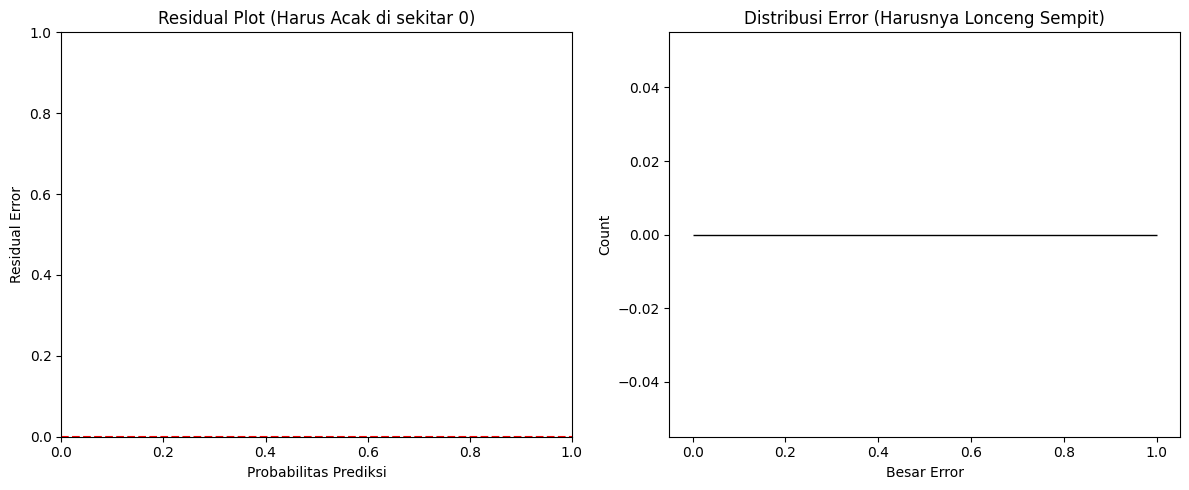

In [75]:
# Residual = Kenyataan (0/1) - Keyakinan Model (0.1 - 0.9)
residuals = y_test.values - probs_test

plt.figure(figsize=(12, 5))

# Plot Scatter
plt.subplot(1, 2, 1)
sns.scatterplot(x=probs_test, y=residuals, alpha=0.6, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot (Harus Acak di sekitar 0)")
plt.xlabel("Probabilitas Prediksi")
plt.ylabel("Residual Error")

# Plot Histogram (Bell Curve Error)
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True, color='teal')
plt.title("Distribusi Error (Harusnya Lonceng Sempit)")
plt.xlabel("Besar Error")

plt.tight_layout()
plt.show()

## F. GUI